**Table of contents**    
- Importing libraries and loading the data    
- Exploratory analysis and data cleaning    
  - Count and share of each category for each object variable    
  - Adding overall_score column, replacing strings, renaming columns and melting the data    
- Scores analysis    
  - Histograms of scores by exam type    
  - Boxplots of scores by exam type    
  - Boxplots of scores by parental level of education    
  - Boxplots of exam scores by group    
  - Correlation between scores    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=false
	flat=false
	minLevel=2
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## Importing libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
df = pd.read_csv('exams.csv')

## Exploratory analysis and data cleaning

In [3]:
df.shape

(1000, 8)

In [4]:
df.describe().round(2)

,math score,reading score,writing score
count,1000.0,1000.00,1000.00
mean,66.4,69.00,67.74
std,15.4,14.74,15.60
min,13.0,27.00,23.00
25%,56.0,60.00,58.00
50%,66.5,70.00,68.00
75%,77.0,79.00,79.00
max,100.0,100.00,100.00


In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.select_dtypes('object').columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

### Count and share of each category for each object variable

In [19]:
for column in df.select_dtypes('object').columns.to_list():
    print(f'{column}:\n')
    print(f'{df[column].value_counts()}\n')
    print(f'{df[column].value_counts() / df[column].value_counts().sum()}\n')

gender:

male      517
female    483
Name: gender, dtype: int64

male      0.517
female    0.483
Name: gender, dtype: float64

race/ethnicity:

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

group C    0.323
group D    0.262
group B    0.205
group E    0.131
group A    0.079
Name: race/ethnicity, dtype: float64

parental level of education:

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

some college          0.222
associate's degree    0.203
high school           0.202
some high school      0.191
bachelor's degree     0.112
master's degree       0.070
Name: parental level of education, dtype: float64

lunch:

standard        652
free/reduced    348
Name: lunch, dtype: int64

standard        0.652
free/reduced    0.348
Name: lunch, dtype: float64

test preparation cou

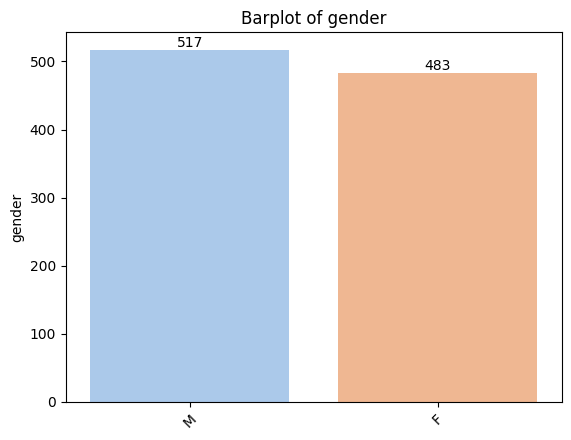

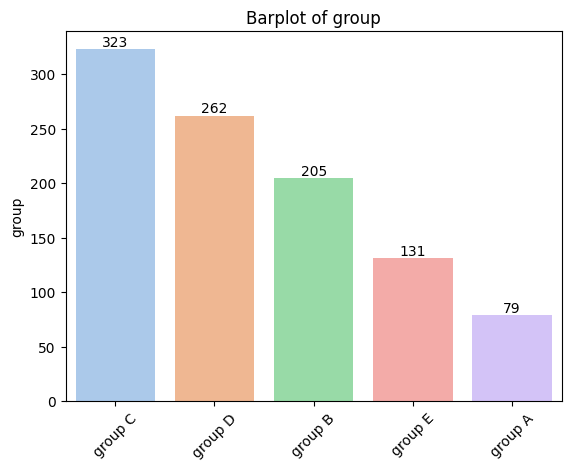

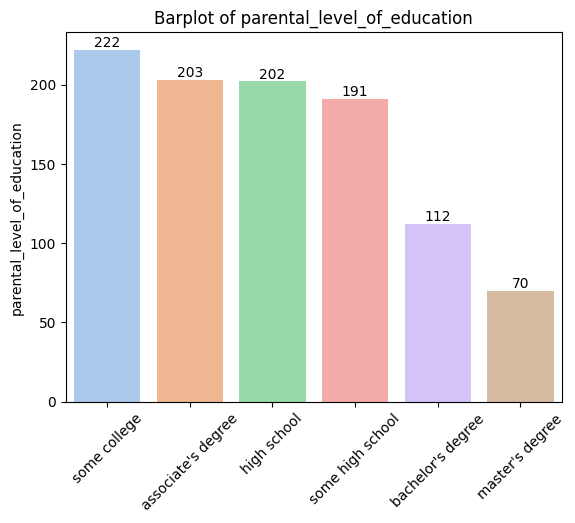

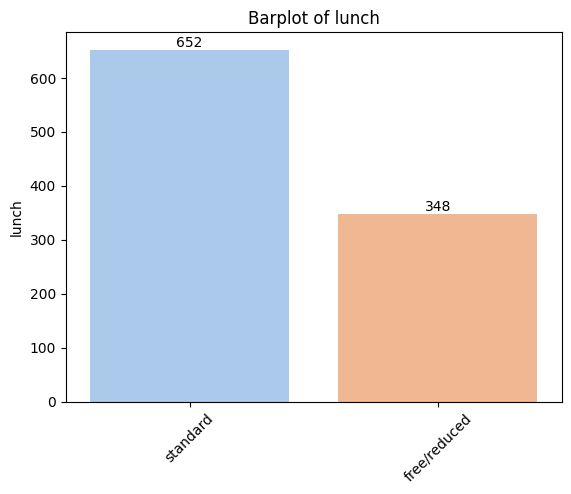

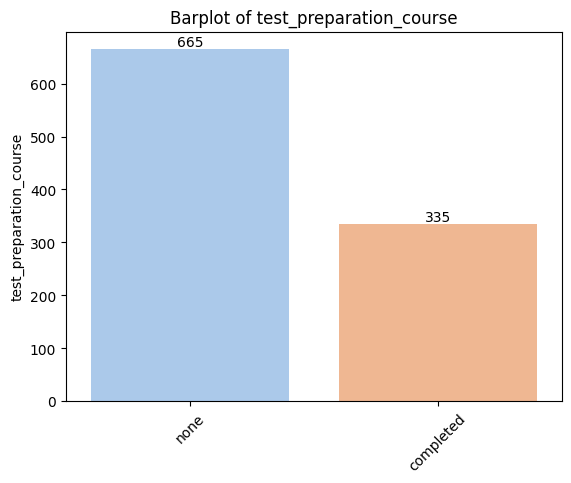

In [42]:
for variable_to_plot in df.select_dtypes('object').columns.to_list():
    bar = sns.barplot(x=df[variable_to_plot].value_counts().index,
                      y=df[variable_to_plot].value_counts(),
                      palette = sns.color_palette('pastel'))
    for container in bar.containers:
        plt.bar_label(container, label_type='edge')
    plt.title(f'Barplot of {variable_to_plot}')
    plt.xticks(rotation=45)
    plt.show()

### Adding overall_score column, replacing strings, renaming columns and melting the data

In [21]:
df['overall_score'] = df.iloc[:,-3:].sum(axis=1)

In [23]:
df['gender'].replace({'male':'M',
                      'female':'F'}, inplace= True)

In [24]:
df.rename(columns = {'race/ethnicity':'group'},inplace= True)

In [25]:
df.columns = [i.replace(' ','_') for i in df.columns]

In [26]:
pd.melt(df,value_vars=['math_score','reading_score','writing_score'],value_name='exam').sort_values('exam',ascending=False)

,variable,exam
638,math_score,100
2706,writing_score,100
2754,writing_score,100
732,math_score,100
2855,writing_score,100
...,...,...
2392,writing_score,23
2885,writing_score,23
18,math_score,23
832,math_score,13


## Scores analysis

### Histograms of scores by exam type

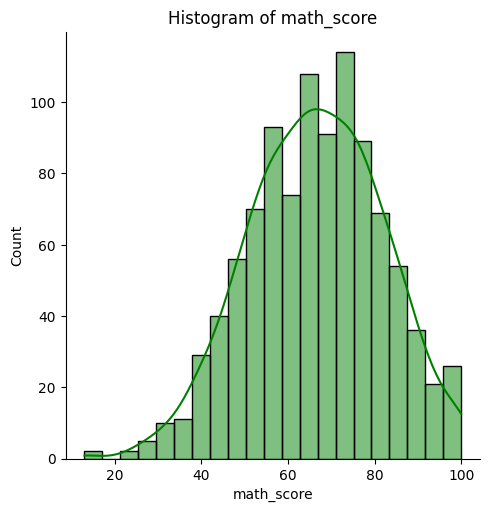

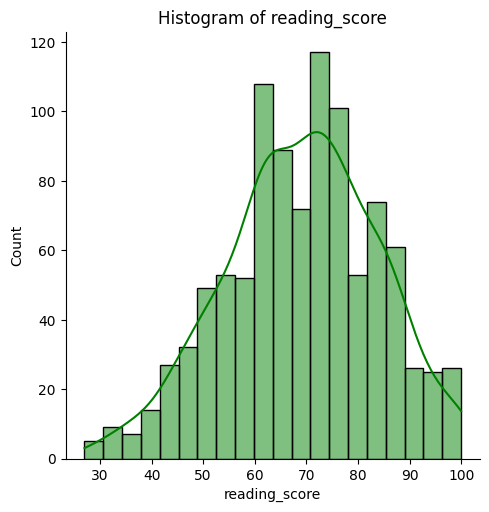

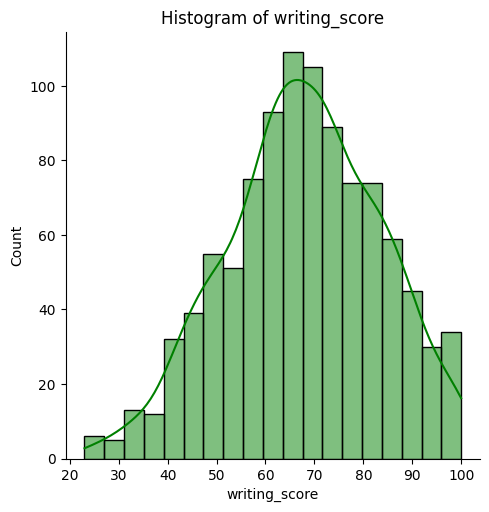

In [44]:
for i in ['math_score','reading_score','writing_score']:
    sns.displot(data = df,
                      x = i,
                      kde = True,
                      color = 'Green')
    plt.title(f'Histogram of {i}')
    plt.show()

### Boxplots of scores by exam type

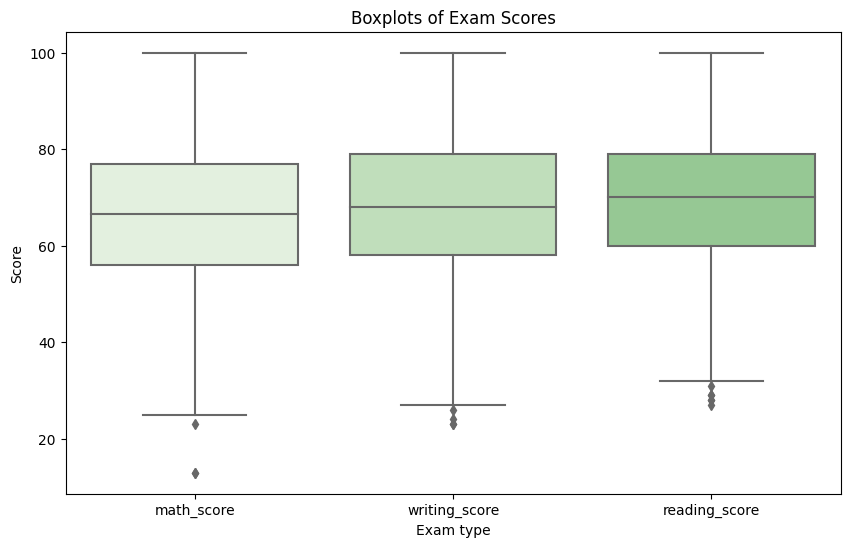

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(data = pd.melt(df,value_vars=['math_score','reading_score','writing_score'],value_name='exam').sort_values('exam',ascending=False),
            x = 'variable',
            y='exam',
            palette = sns.color_palette('Greens'))
            #alette = ['#3B7974','#56B4AD','#6CDFD7'])
plt.title('Boxplots of Exam Scores')
plt.xlabel('Exam type')
plt.ylabel('Score')
plt.show()

In [46]:
df_melt = pd.melt(df,
        id_vars=['gender','group','parental_level_of_education','lunch','test_preparation_course'],
        value_vars=['math_score','reading_score','writing_score'],var_name='exam',value_name='score')

In [53]:
df_melt.head(10)

,gender,group,parental_level_of_education,lunch,test_preparation_course,exam,score
0,M,group A,high school,standard,completed,math_score,67
1,F,group D,some high school,free/reduced,none,math_score,40
2,M,group E,some college,free/reduced,none,math_score,59
3,M,group B,high school,standard,none,math_score,77
4,M,group E,associate's degree,standard,completed,math_score,78
5,F,group D,high school,standard,none,math_score,63
6,F,group A,bachelor's degree,standard,none,math_score,62
7,M,group E,some college,standard,completed,math_score,93
8,M,group D,high school,standard,none,math_score,63
9,M,group C,some college,free/reduced,none,math_score,47


In [48]:
df_melt.groupby(['exam','parental_level_of_education'])['score'].median().reset_index().sort_values(['exam','score'])

,exam,parental_level_of_education,score
5,math_score,some high school,60.0
2,math_score,high school,66.0
4,math_score,some college,66.0
0,math_score,associate's degree,70.0
1,math_score,bachelor's degree,71.0
3,math_score,master's degree,71.0
11,reading_score,some high school,64.0
8,reading_score,high school,68.0
10,reading_score,some college,69.0
6,reading_score,associate's degree,72.0


### Boxplots of scores by parental level of education

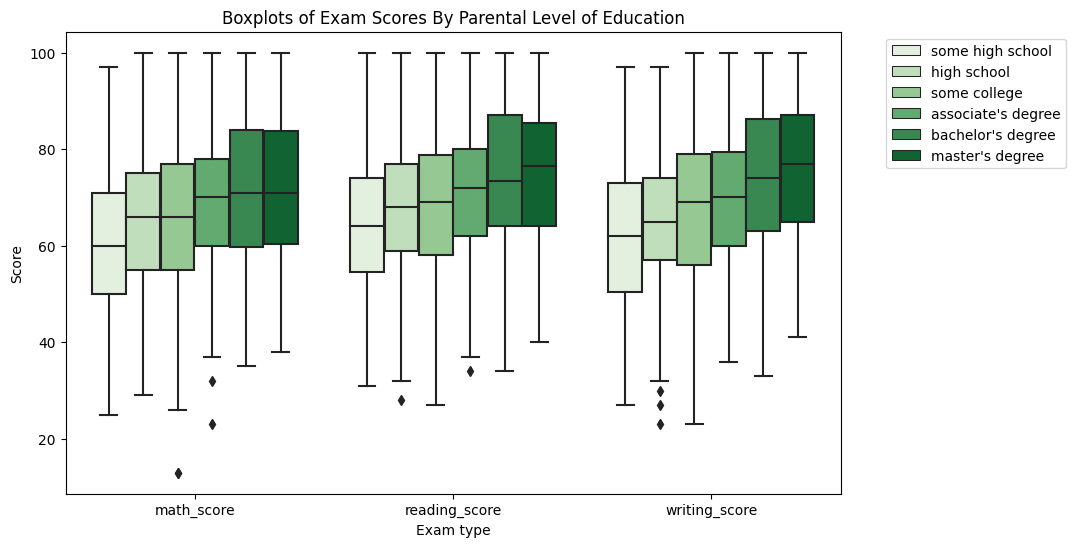

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df_melt,
            x = 'exam',
            y = 'score',
            palette = sns.color_palette('Greens'),
            hue = 'parental_level_of_education',
            hue_order = ['some high school','high school','some college','''associate's degree''','''bachelor's degree''','''master's degree'''])
plt.legend(bbox_to_anchor = (1.05,1))
plt.title('Boxplots of Exam Scores By Parental Level of Education')
plt.xlabel('Exam type')
plt.ylabel('Score')
plt.show()

### Boxplots of exam scores by group

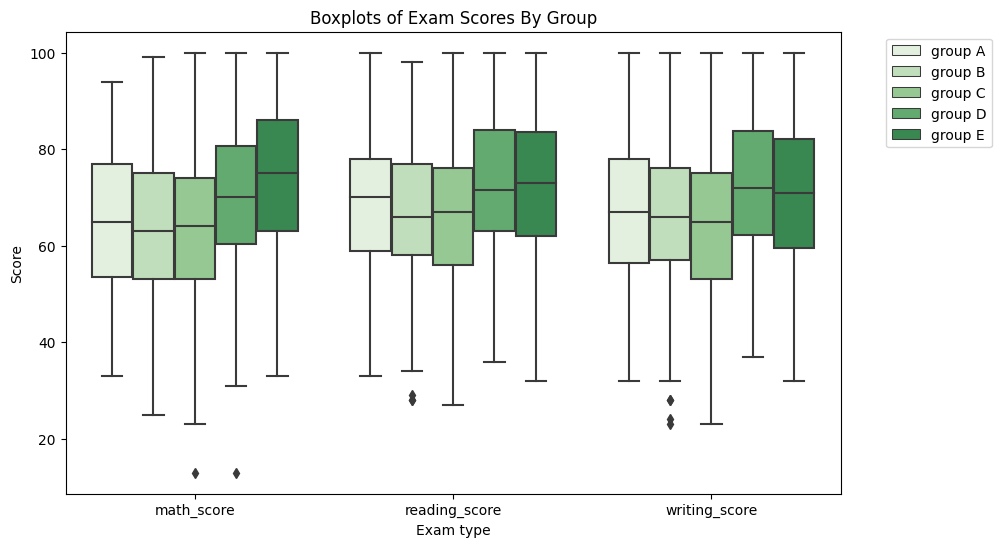

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df_melt,
            x = 'exam',
            y = 'score',
            palette = sns.color_palette('Greens'),
            hue = 'group',
            hue_order = ['group A','group B','group C','group D','group E'])
plt.legend(bbox_to_anchor = (1.05,1))
plt.title('Boxplots of Exam Scores By Group')
plt.xlabel('Exam type')
plt.ylabel('Score')
plt.show()

### Correlation between scores

#### Correlation between writing score and reading score (0.95) is higher than correlation between both math score and reading score (0.82) and between math score and writing score (0.81)

In [51]:
df[['math_score','reading_score','writing_score']].corr().round(2)

,math_score,reading_score,writing_score
math_score,1.00,0.82,0.81
reading_score,0.82,1.00,0.95
writing_score,0.81,0.95,1.00
